# ANALYSIS OF UNEMPLOYEMENT RATE IN INDIA - COVID TIME


#### submitted by Tels Mariya Thomas as part of internship at OasisInfobyte

TASK 2

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 


https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

This dataset contains the unemployment rate of all the states in India

Region = states in India\
Date = date which the unemployment rate observed\
Frequency = measuring frequency (Monthly)\
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India\
Estimated Employed = percentage of people employed\
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force


In [3]:
# load the data
data=pd.read_csv(r"C:\Users\telsm\Documents\datascience\data science\extra\oasis infobyte internship\task 2\archive (2)\Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get the information about the data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# check the nulll values
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
# drop the missing values
df=data.dropna()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
df.describe(include=object)

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
df[['day', 'month', 'year']] = df[' Date'].str.split('-', expand=True)

In [12]:
df1=df.drop(' Date', axis=1)

In [13]:
df1

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020


In [14]:
for i in df1.select_dtypes(include=object).columns:
    print(i, df1[i].unique(),'\n')

Region ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh'] 

 Frequency [' Monthly' 'Monthly'] 

Area ['Rural' 'Urban'] 

day [' 31' ' 30' ' 29'] 

month ['05' '06' '07' '08' '09' '10' '11' '12' '01' '02' '03' '04'] 

year ['2019' '2020'] 



The frequency can be dropped as it has only one unique entry in it 

In [15]:
df2=df1.drop(' Frequency', axis=1)

In [16]:
df2

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...
749,West Bengal,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,15.22,9240903.0,40.67,Urban,31,05,2020


# VISUALIZATION AND ANALYSIS 

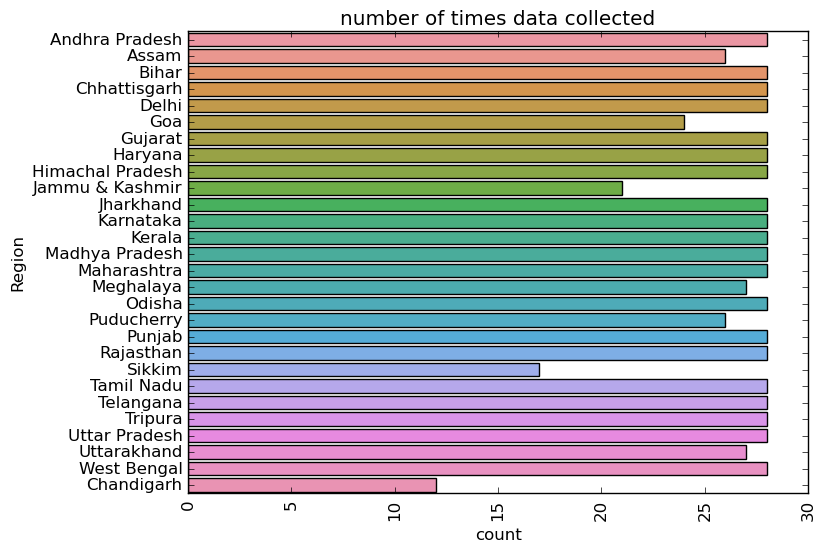

In [17]:
plt.figure(figsize=(8,6))
plt.style.use('classic')
sns.countplot(y=df2['Region'])
plt.xticks(rotation=90)
plt.title('number of times data collected')
plt.show()

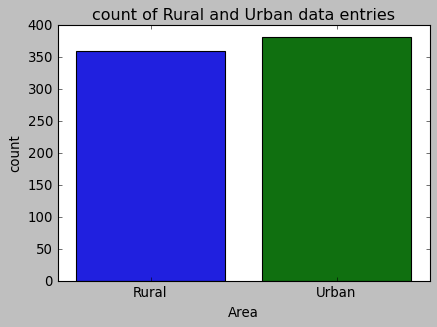

In [18]:
plt.figure(figsize=(6,4))
plt.style.use('classic')
sns.countplot(x=df2['Area'])
plt.xticks(rotation=0)
plt.title('count of Rural and Urban data entries')
plt.show()

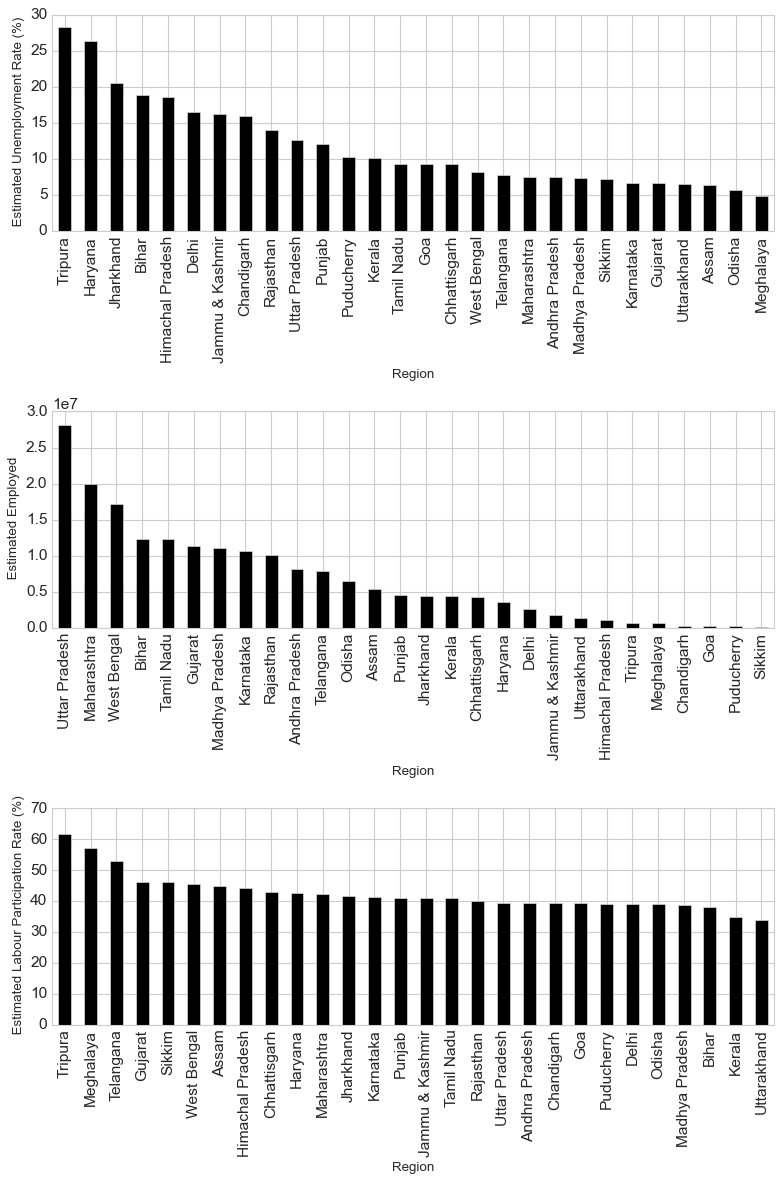

In [76]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,15))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(3,1,re)
    df2.groupby(df2['Region'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='black')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

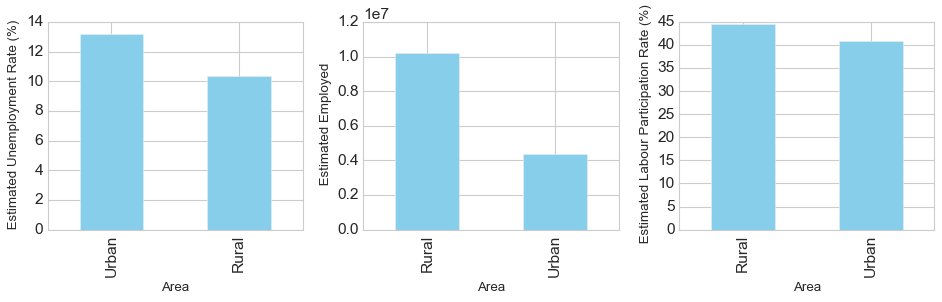

In [74]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df2['Area'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='skyblue')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

In [33]:
df2.columns

Index(['Region', ' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)', 'Area', 'day', 'month',
       'year'],
      dtype='object')

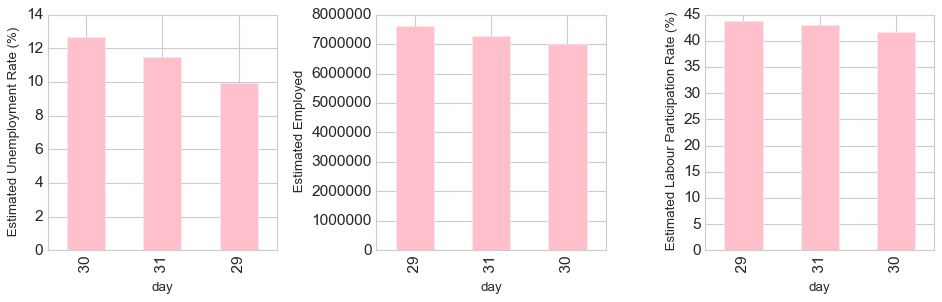

In [79]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df2['day'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='pink')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

In [87]:
df2['month']=df2['month'].astype(int)

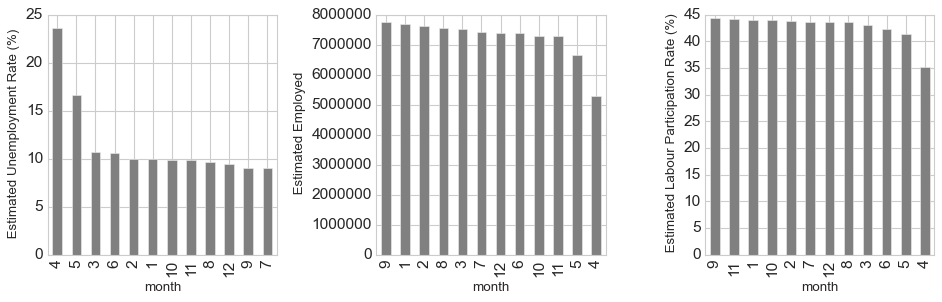

In [93]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df2['month'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='grey')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

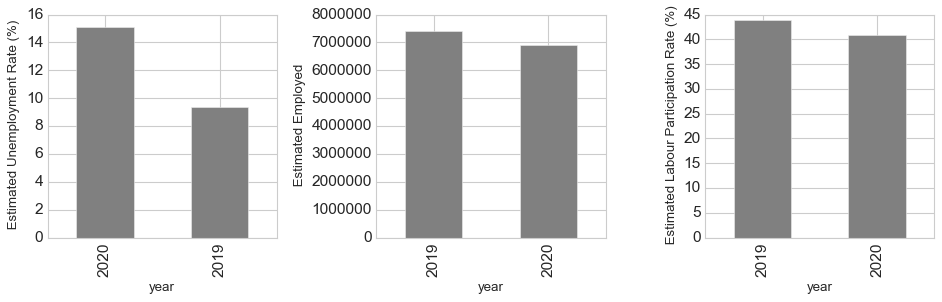

In [96]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df2['year'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='grey')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

<Axes: >

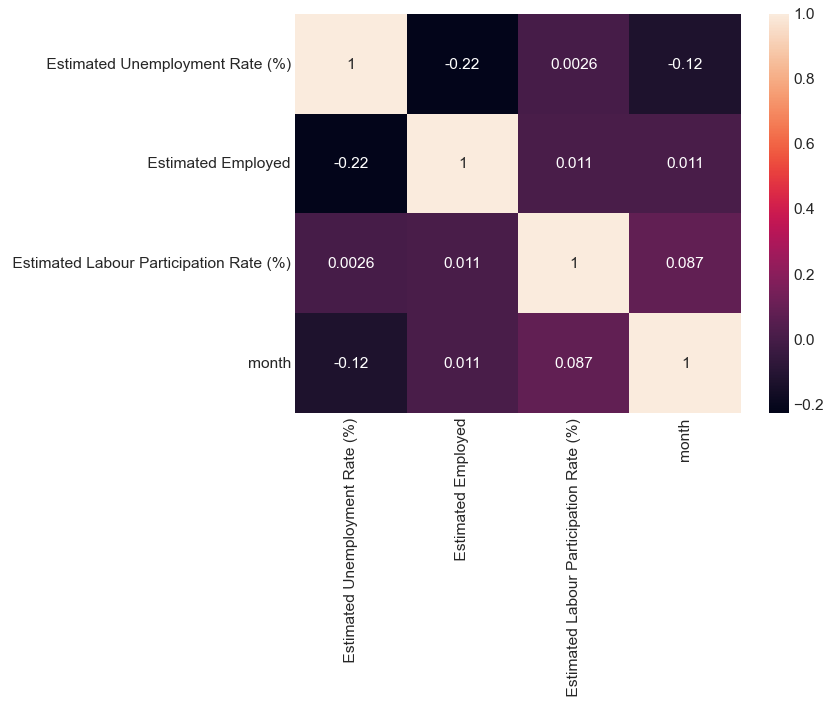

In [95]:
sns.heatmap(df2.corr(), annot=True)



##### overall analysis 
    *The average unemployement rate is high in Tripura
    *Meghalaya has the lowest unemplyement rate 
    *The count of estimated employed  is high in utter pradesh region while it is low in Sikkim. 
    *The estimated Labour participation rate is high in Tripura and low in Uttarakhand.
    *The estimated empolyement rate is high uraban compared to rural areas. 
    *The estimated employeed people are high in Rural Areas. 
    *The estimated Labour Participation rate is high in Rural Areas. 
    *The estimated unemployement rate is higheer in 3oth day of the month. 
    *estimated  amployed count AND ESTIMATED LABOUR participation rate is high on 29th of the month.
    *In the fourth month the estimated unemployment rate is very high Estimated employed count is similar in almost all the month except 4th month.
    *The estimated participation rate is very low at 4th month
    *Estimated unemployment rate is high in 2020
    *The estimated employed is high in 2019 and low 2020
    *The estimated labour participation rate is high in 2019

## Analysing the trend of 2019

In [189]:
df19=df2[df2['year']=='2019']
df19

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,31,5,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,30,6,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,31,7,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,31,8,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,30,9,2019
...,...,...,...,...,...,...,...,...
743,West Bengal,7.27,11456493.0,46.77,Urban,31,8,2019
744,West Bengal,7.79,11158649.0,45.74,Urban,30,9,2019
745,West Bengal,7.83,10563686.0,43.25,Urban,31,10,2019
746,West Bengal,6.61,10768462.0,43.44,Urban,30,11,2019


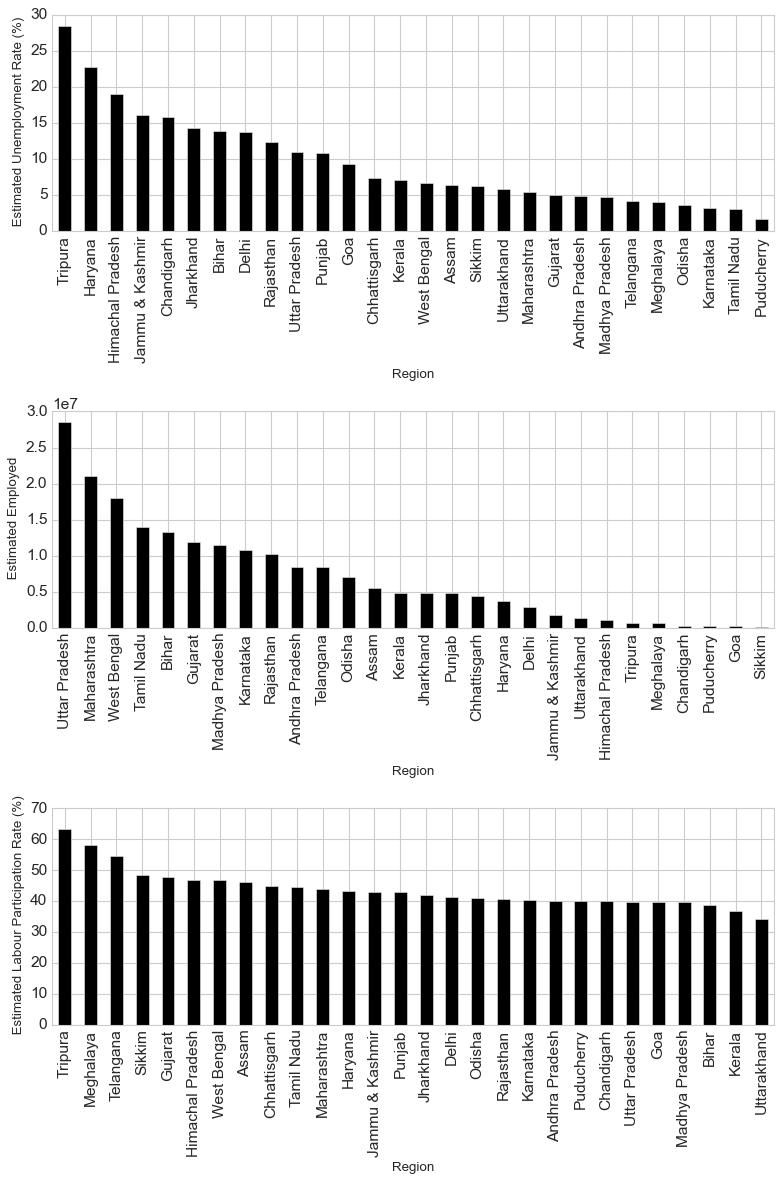

In [119]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,15))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(3,1,re)
    df2.groupby(df19['Region'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='black')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

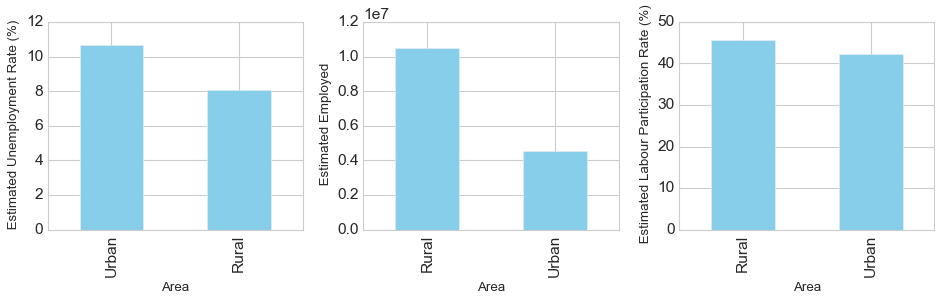

In [120]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df19['Area'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='skyblue')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

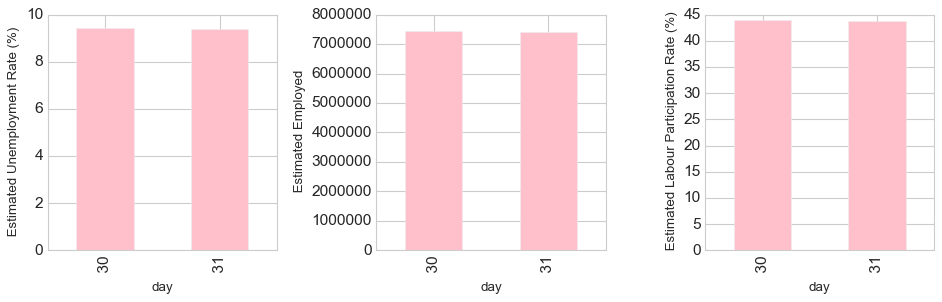

In [121]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df19['day'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='pink')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

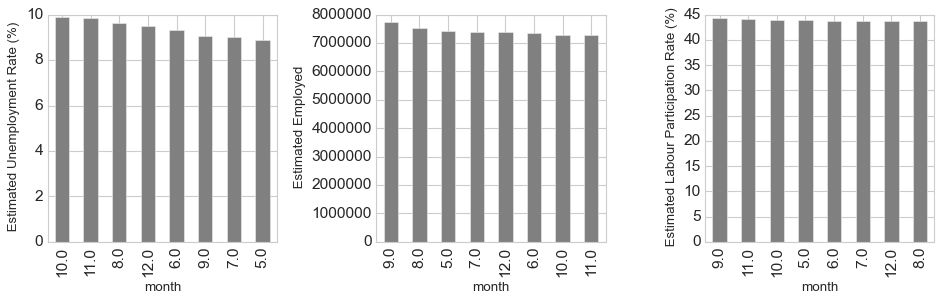

In [122]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df19['month'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='grey')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

#### conclusions about 2019
    *In 2019 Tripura has the highest estimated unemployment rate and highest estimated labour participation rate
    *The estimated unemployment rate in urban areas is high in 2019 compared to rural areas
    *The estimated employed is high in rural areas in 2019 and the estimated labour participation rate is also high in rural areas
    *In 2019 in 30th day and 31st today almost similar estimated unemployment rate


## Analysing the trend of 2020

In [112]:
df20=df2[df2['year']=='2020']
df20

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
8,Andhra Pradesh,4.84,12016676.0,43.46,Rural,31,1,2020
9,Andhra Pradesh,5.91,11723617.0,42.83,Rural,29,2,2020
10,Andhra Pradesh,4.06,11359660.0,40.66,Rural,31,3,2020
11,Andhra Pradesh,16.29,8792827.0,36.03,Rural,30,4,2020
12,Andhra Pradesh,14.46,9526902.0,38.16,Rural,31,5,2020
...,...,...,...,...,...,...,...,...
749,West Bengal,7.55,10871168.0,44.09,Urban,29,2,2020
750,West Bengal,6.67,10806105.0,43.34,Urban,31,3,2020
751,West Bengal,15.63,9299466.0,41.20,Urban,30,4,2020
752,West Bengal,15.22,9240903.0,40.67,Urban,31,5,2020


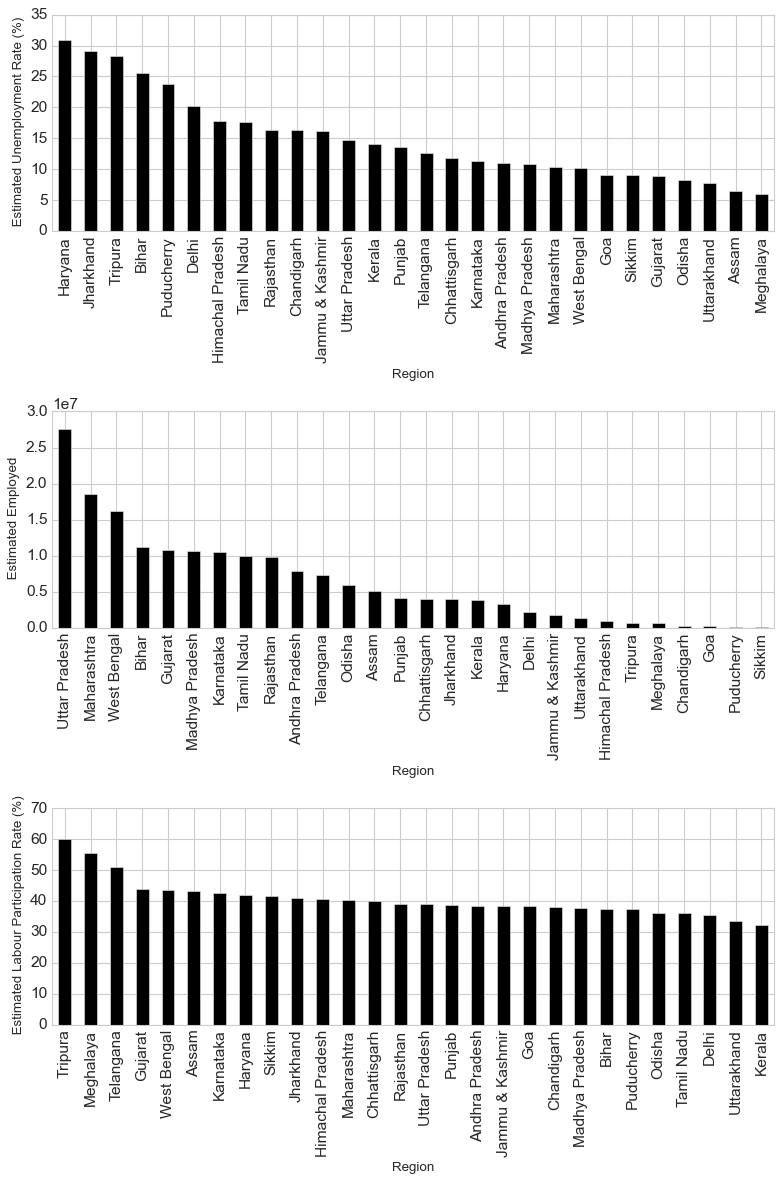

In [113]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,15))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(3,1,re)
    df2.groupby(df20['Region'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='black')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

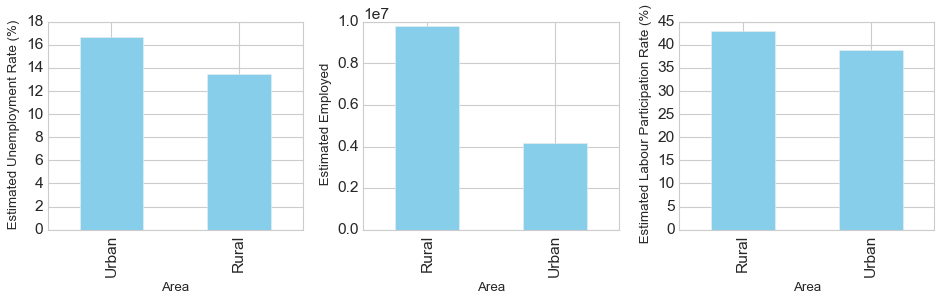

In [114]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df20['Area'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='skyblue')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

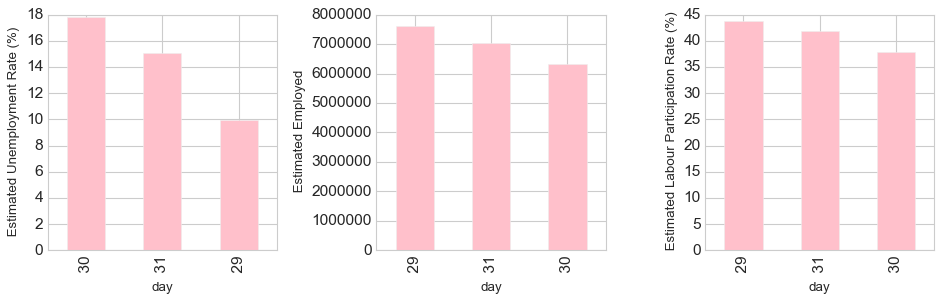

In [115]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df20['day'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='pink')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

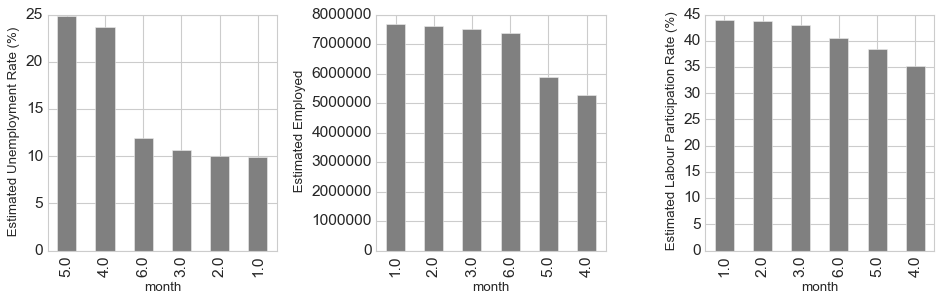

In [116]:
re=1
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12,4))
for i in [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']:
    plt.subplot(1,3,re)
    df2.groupby(df20['month'])[i].mean().sort_values(ascending=False).\
    plot(kind='bar', color='grey')
    plt.ylabel(i)
    re+=1
plt.tight_layout()
plt.show()

#### conclusions about 2020
    *In 2020 the estimated unemployment rate is high in Haryana and estimated employed rate is high in Uttar Pradesh
    *In 2020 the estimated unemployment rate is high in urban areas compared to rural
    *In 2020 there is a huge difference in estimated unemployment rate on the collected days 30 31st and 29.
        In which the estimated unemployment rate is very high on 30th of a month followed by 31st and 29.
    *In 2020 we have only 6 months data in which the estimated unemployment rate is high in 5th month

## Unemployement rate -- Comparing 2019 and 2020

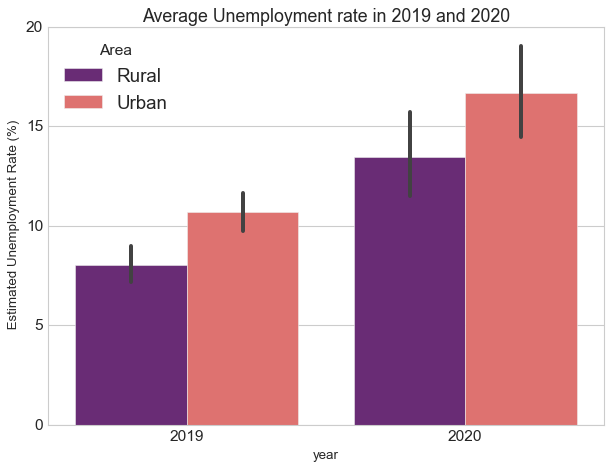

In [143]:
sns.barplot(y=df2[' Estimated Unemployment Rate (%)'], x=df2['year'], hue=df2['Area'],palette='magma')
plt.title('Average Unemployment rate in 2019 and 2020')
plt.show()

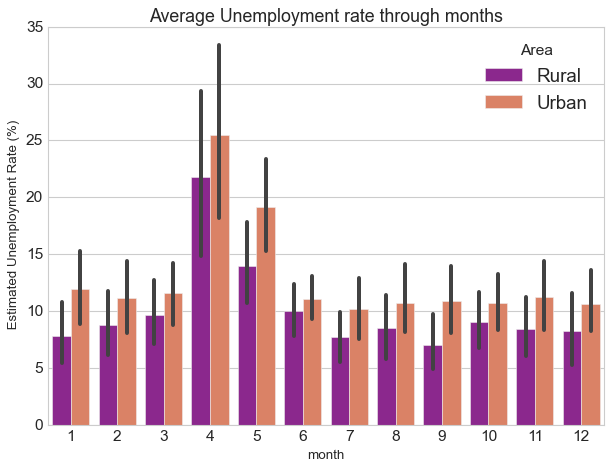

In [142]:
sns.barplot(y=df2[' Estimated Unemployment Rate (%)'], x=df2['month'], hue=df2['Area'],palette='plasma')
plt.title('Average Unemployment rate through months')
plt.show()

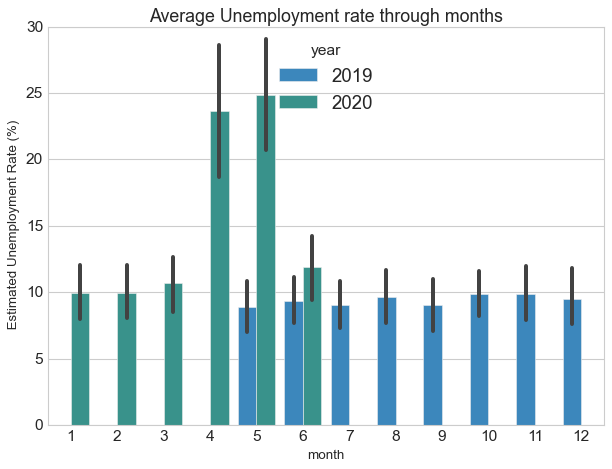

In [133]:
sns.barplot(y=df2[' Estimated Unemployment Rate (%)'], x=df2['month'], hue=df2['year'])
plt.title('Average Unemployment rate through months')
plt.show()

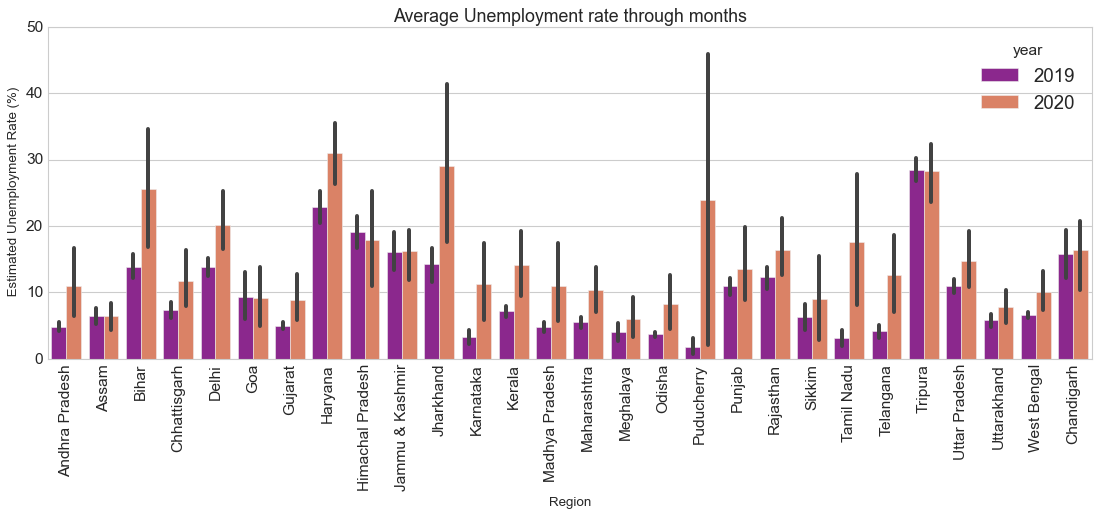

In [141]:
plt.figure(figsize=(15,5))
sns.barplot(y=df2[' Estimated Unemployment Rate (%)'], x=df2['Region'], hue=df2['year'],palette='plasma')
plt.title('Average Unemployment rate through months')
plt.xticks(rotation=90)
plt.show()


#### Conclusions after comparing 2019 and 2020

Average unemployment rate of 2020 is high compared to 2019 in both rural and urban areas

In both the years the unemployment rate in urban areas is high

In the month of April the estimated unemployment rate is very high in both rural and urban areas.


The estimated unemployment rate is very high in 4th month of 2019 and 5th month 2020

In 2019 the highest unemployment rate is in Tripura violin 2020 changed to Haryana

###  finding the most affected region

In [148]:
df3=df2.copy()

In [197]:
aff=pd.DataFrame()
aff['2019 avg']=df19.groupby('Region')[[' Estimated Unemployment Rate (%)']].mean()
aff['2020 avg']=df20.groupby('Region')[[' Estimated Unemployment Rate (%)']].mean()
aff['avg diff']=aff['2020 avg']-aff['2019 avg']

In [201]:
aff.sort_values(by='avg diff', ascending=False)

,2019 avg,2020 avg,avg diff
Region,,,
Puducherry,1.699375,23.840000,22.140625
Jharkhand,14.233750,29.053333,14.819583
Tamil Nadu,3.063750,17.578333,14.514583
Bihar,13.882500,25.632500,11.750000
Telangana,4.115625,12.567500,8.451875
Haryana,22.798750,30.929167,8.130417
Karnataka,3.238750,11.259167,8.020417
Kerala,7.131250,14.114167,6.982917
Delhi,13.750625,20.155000,6.404375


<Axes: xlabel='Region'>

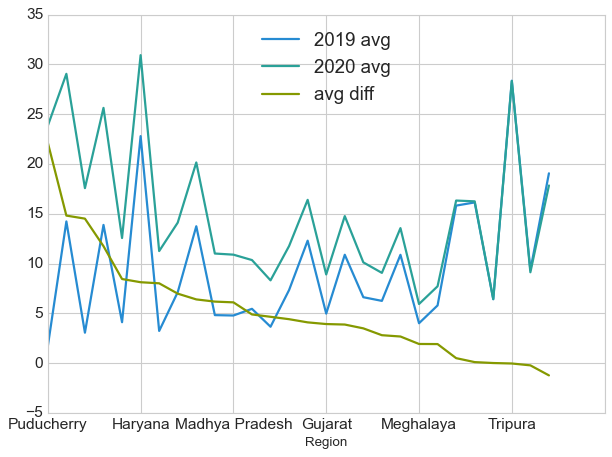

In [200]:
aff.sort_values(by='avg diff', ascending=False).plot()

By analysing the difference of the unemployment rate it is clear that 
Puducherry is the most affected region  with an increase of unemployment rate of 22.414.
While there are other states like Tripura Goa and Himachal Pradesh which decreases the unemployment rate.

The unemployment rate of the data set follows similar patterns in the same months of different year.

## CONCLUSIONS 

##### THE FOLLOWING POINTS CAN BE SUMMARIZED 
    The average unemployement rate is high in Tripura
    Meghalaya has the lowest unemplyement rate 
    The count of estimated employed  is high in utter pradesh region while it is low in Sikkim. 
    The estimated Labour participation rate is high in Tripura and low in Uttarakhand.
    The estimated empolyement rate is high uraban compared to rural areas. 
    The estimated employeed people are high in Rural Areas. 
    The estimated Labour Participation rate is high in Rural Areas. 
    The estimated unemployement rate is higheer in 3oth day of the month. 
    estimated  amployed count AND ESTIMATED LABOUR participation rate is high on 29th of the month.
    In the fourth month the estimated unemployment rate is very high Estimated employed count is similar in almost all the month except 4th month.
    
    
    The estimated participation rate is very low at 4th month
    Estimated unemployment rate is high in 2020
    The estimated employed is high in 2019 and low 2020
    The estimated labour participation rate is high in 2019



    In 2019 Tripura has the highest estimated unemployment rate and highest estimated labour participation rate
    The estimated unemployment rate in urban areas is high in 2019 compared to rural areas
    The estimated employed is high in rural areas in 2019 and the estimated labour participation rate is also high in rural areas
    In 2019 in 30th day and 31st today almost similar estimated unemployment rate.



    In 2020 the estimated unemployment rate is high in Haryana and estimated employed rate is high in Uttar Pradesh
    In 2020 the estimated unemployment rate is high in urban areas compared to rural
    In 2020 there is a huge difference in estimated unemployment rate on the collected days 30 31st and 29. In which the estimated unemployment rate is very high on 30th of a month followed by 31st and 29.
    In 2020 we have only 6 months data in which the estimated unemployment rate is high in 5th month



    Average unemployment rate of 2020 is high compared to 2019 in both rural and urban areas
    In both the years the unemployment rate in urban areas is high
    In the month of April the estimated unemployment rate is very high in both rural and urban areas.
    The estimated unemployment rate is very high in 4th month of 2019 and 5th month 2020
    In 2019 the highest unemployment rate is in Tripura violin 2020 changed to Haryana






By analysing the difference of the unemployment rate it is clear that Puducherry is the most affected region with an increase of unemployment rate of 22.414. While there are other states like Tripura Goa and Himachal Pradesh which decreases the unemployment rate. The unemployment rate of the data set follows similar patterns in the same months of different year.


##### thank you